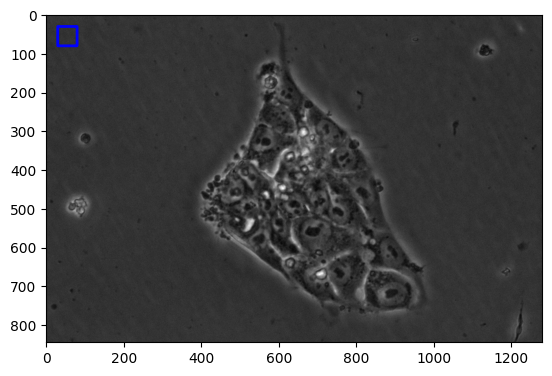

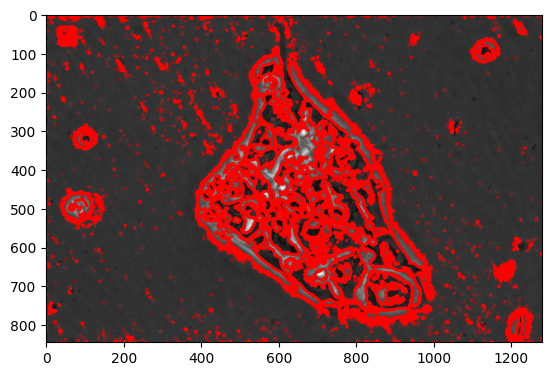

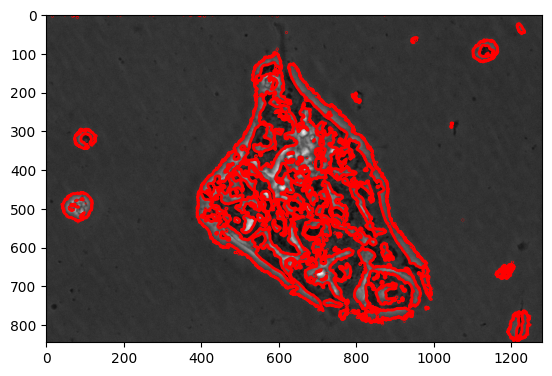

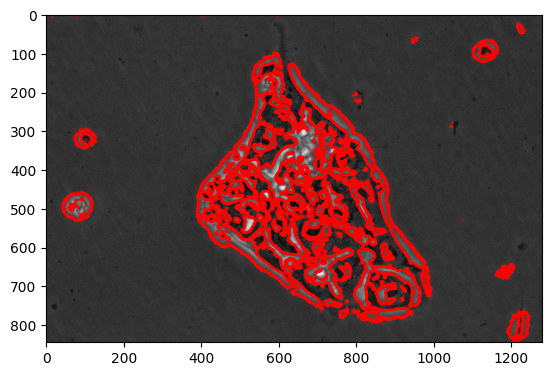

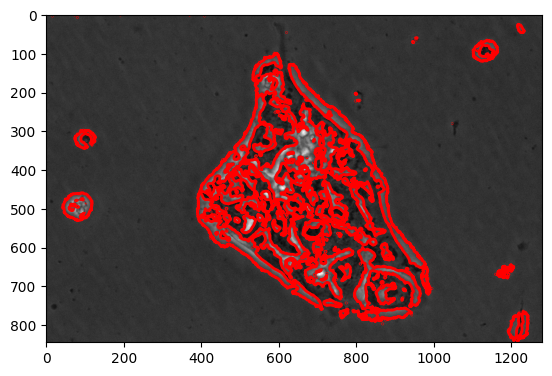

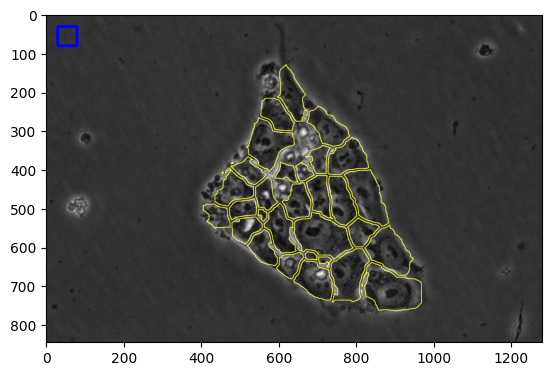

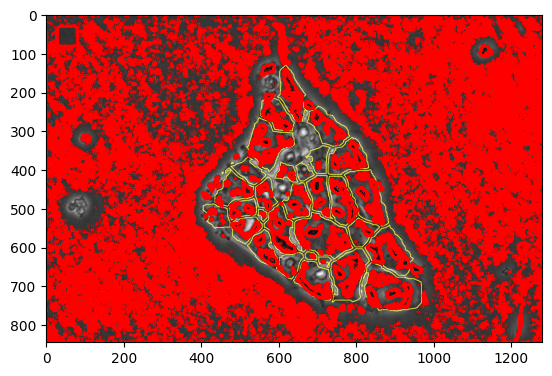

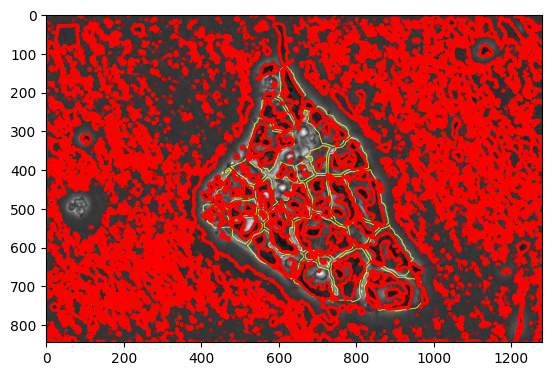

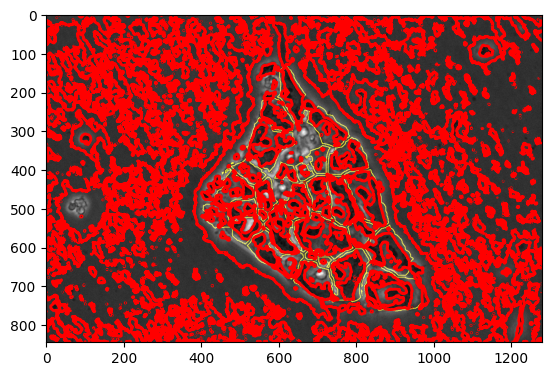

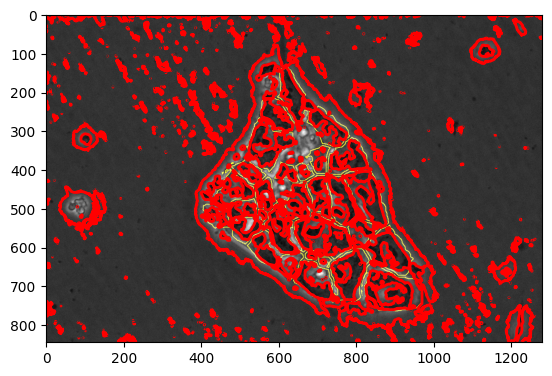

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.font_manager as fm

#plt.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['axes.unicode_minus'] = False


def mat_math(input_array, operation):
    if operation == "atan":
        return np.arctan(input_array)
    elif operation == "sqrt":
        return np.sqrt(input_array)
    return input_array


def chan_vese(LSF, img, mu, nu, epsilon, step):
    Drc = (epsilon / np.pi) / (epsilon**2 + LSF**2)
    Hea = 0.5 * (1 + (2 / np.pi) * np.arctan(LSF / epsilon))

    Ix, Iy = np.gradient(LSF)
    s = np.sqrt(Ix**2 + Iy**2) + 1e-6
    Nx, Ny = Ix / s, Iy / s

    Nxx, _ = np.gradient(Nx)
    _, Nyy = np.gradient(Ny)
    curvature = Nxx + Nyy
    length_term = nu * Drc * curvature

    laplacian = cv2.Laplacian(LSF, cv2.CV_64F)
    penalty = mu * (laplacian - curvature)

    c1 = np.sum(Hea * img) / np.sum(Hea)
    c2 = np.sum((1 - Hea) * img) / np.sum(1 - Hea)
    CVterm = Drc * (-((img - c1) ** 2) + ((img - c2) ** 2))

    return LSF + step * (length_term + penalty + CVterm)


def main(image_path):
    Image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    img_gray = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY).astype(np.float64)

    LSF = np.ones_like(img_gray)
    LSF[30:80, 30:80] = -1
    LSF = -LSF

    plt.figure()
    plt.imshow(cv2.cvtColor(Image, cv2.COLOR_BGR2RGB))
    plt.contour(LSF, [0], colors='b', linewidths=2)
    plt.show(block=False)

    mu, nu, epsilon, step = 1, 0.003 * 255 * 255, 1, 0.1
    num_iterations = 20

    for i in range(1, num_iterations + 1):
        LSF = chan_vese(LSF, img_gray, mu, nu, epsilon, step)
        if i % 5 == 0:  # Update visualization every 5 iterations
            plt.clf()
            plt.imshow(cv2.cvtColor(Image, cv2.COLOR_BGR2RGB))
            plt.contour(LSF, [0], colors='r', linewidths=2)
            plt.pause(0.01)

    plt.show()


if __name__ == "__main__":
    main("genimage.tif")
    main("markerimage.tif")
